In [2]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

boston = load_boston()
bos = pd.DataFrame(boston.data)

bos.columns = boston.feature_names
bos['PRICE'] = boston.target

# Observing the data

In [3]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**CRIM**: a numeric vector of per capita crime

**ZN**: a numeric vector of proportions of residential land zoned for lots over 25000 sq. ft per town (constant for all Boston tracts)

**INDUS**: a numeric vector of proportions of non-retail business acres per town (constant for all Boston tracts)

**CHAS**: a factor with levels 1 if tract borders Charles River; 0 otherwise

**NOX**: a numeric vector of nitric oxides concentration (parts per 10 million) per town

**RM**: a numeric vector of average numbers of rooms per dwelling

**AGE**: a numeric vector of proportions of owner-occupied units built prior to 1940

**DIS**: a numeric vector of weighted distances to five Boston employment centres

**RAD**: a numeric vector of an index of accessibility to radial highways per town (constant for all Boston tracts)

**TAX**: a numeric vector full-value property-tax rate per USD 10,000 per town (constant for all Boston tracts)

**PTRATIO**: a numeric vector of pupil-teacher ratios per town (constant for all Boston tracts)

**B**: a numeric vector of 1000*(Bk - 0.63)^2 where Bk is the proportion of blacks

**LSTAT**: a numeric vector of percentage values of lower status population

**PRICE**: price of the house


In [4]:
bos.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


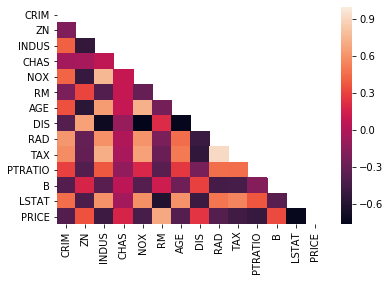

In [107]:
import seaborn as sns
matrix = np.triu(bos.corr())
ax = sns.heatmap(bos.corr(), mask=matrix)

In [ ]:
#Generally as the age of the house goes up, the price goes down.
#Getting the linear regression and fitting it to the data

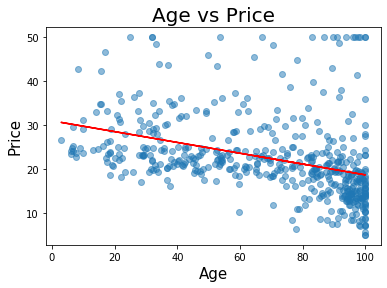

In [4]:
from sklearn.linear_model import LinearRegression

x = bos['AGE']
y = bos['PRICE']

x_reshaped = x.values.reshape(-1, 1)

regressor = LinearRegression()  
regressor.fit(x_reshaped, y) #training the algorithm
y_pred = regressor.predict(x_reshaped)

fig, ax = plt.subplots()

ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Price', fontsize=15)
ax.set_title('Age vs Price', fontsize=20)

ax.scatter(x, y, alpha=0.5)
plt.plot(x_reshaped, y_pred, color='red')

plt.show()

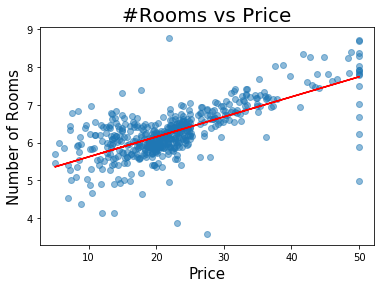

In [5]:
#Price vs number of rooms
x = bos['PRICE']
y = bos['RM']

x_reshaped = x.values.reshape(-1, 1)

#training the algorithm
regressor = LinearRegression()  
regressor.fit(x_reshaped, y) 
y_pred = regressor.predict(x_reshaped)

fig, ax = plt.subplots()

plt.scatter(x, y, alpha=0.5)
ax.set_title('#Rooms vs Price', fontsize=20)
plt.xlabel('Price',fontsize=15)
plt.ylabel('Number of Rooms',fontsize=15)
plt.plot(x_reshaped, y_pred, color='red')
plt.show()

# Linear Regression Predction Model

In [28]:
from sklearn.model_selection import train_test_split

#Getting train and test data
X = bos[bos.columns[:13]]
Y = bos['PRICE']
#Randomly sampling 75% of the data and 25% for tests
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [29]:
# Instansiate the model (Linear Regression) and train it
bos_reg = LinearRegression()
bos_reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
#Obtaining the coefficient, or weights
bos_reg.coef_

array([-1.17735289e-01,  4.40174969e-02, -5.76814314e-03,  2.39341594e+00,
       -1.55894211e+01,  3.76896770e+00, -7.03517828e-03, -1.43495641e+00,
        2.40081086e-01, -1.12972810e-02, -9.85546732e-01,  8.44443453e-03,
       -4.99116797e-01])

In [31]:
#Obtaining the intercept, or the given bias
bos_reg.intercept_

36.933255457118804

In [32]:
#Prediction values from the trained model
y_pred = bos_reg.predict(X_train)

In [40]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#Obtaining the MSE and R2 Score
print(f'MSE: {mean_squared_error(Y_train, y_pred)}')
print(f'R2 Score: {r2_score(Y_train, y_pred)}')

MSE: 19.640519427908046
R2 Score: 0.7697699488741149


# Apply data normalization (Scaling) to improve the prediction result
Use StandardScaler and then train your Linear Regression Model. Comapre the R Square score with previous one you got

Use MinMaxScaler and then train your Linear Regression Model. Comapre the R Square score with previous one you got

Watch this video: https://www.youtube.com/watch?v=YKP31T5LIXQ

# Using Standard Scaler

In [41]:
from sklearn.preprocessing import StandardScaler

#Scaling data to reduce variance
scaled_X = StandardScaler().fit_transform(X_train)
bos_reg_scaler = LinearRegression().fit(scaled_X, Y_train)

In [42]:
y_pred = bos_reg_scaler.predict(scaled_X)
print(f'MSE: {mean_squared_error(Y_train, y_pred)}')
print(f'R2 Score: {r2_score(Y_train, y_pred)}')

MSE: 19.640519427908046
R2 Score: 0.7697699488741149


# Using Min Max Scaler

In [45]:
from sklearn.preprocessing import MinMaxScaler

#Scaling data to reduce variance
scaledmm_X_train = StandardScaler().fit_transform(X_train)
bos_reg_scaler_mm = LinearRegression().fit(scaledmm_X_train, Y_train)

In [47]:
y_pred = bos_reg_scaler.predict(scaledmm_X_train)
print(f'MSE: {mean_squared_error(Y_train, y_pred)}')
print(f'R2 Score: {r2_score(Y_train, y_pred)}')

MSE: 19.640519427908046
R2 Score: 0.7697699488741149


# Some Testing

In [48]:
#We are using the unscaled regression model for this.
#Getting prediction values

y_pred = bos_reg.predict(X_test)

In [70]:
#Prediction and test lengths
print(len(y_pred))
print(len(Y_test))

127
127


In [71]:
#First 20 of the prediction values
y_pred[0:20]

array([24.95233283, 23.61699724, 29.20588553, 11.96070515, 21.33362042,
       19.46954895, 20.42228421, 21.52044058, 18.98954101, 19.950983  ,
        4.92468244, 16.09694058, 16.93599574,  5.33508402, 39.84434398,
       32.33549843, 22.32772572, 36.54017819, 31.03300611, 23.32172503])

In [72]:
#First 20 of the test values
Y_test[0:20]

329    22.6
371    50.0
219    23.0
403     8.3
78     21.2
15     19.9
487    20.6
340    18.7
310    16.1
102    18.6
418     8.8
411    17.2
446    14.9
386    10.5
162    50.0
299    29.0
480    23.0
196    33.3
175    29.4
37     21.0
Name: PRICE, dtype: float64

In [82]:
#Let's put these two sets of values into a dataframe to compare
# Finally, let's manually check these predictions
df_pred_test = pd.DataFrame(Y_test.tolist(), columns=['Actual'])
df_pred_test['Prediction'] = y_pred
df_pred_test.head(20)

,Actual,Prediction
0,22.6,24.952333
1,50.0,23.616997
2,23.0,29.205886
3,8.3,11.960705
4,21.2,21.333620
5,19.9,19.469549
6,20.6,20.422284
7,18.7,21.520441
8,16.1,18.989541
9,18.6,19.950983


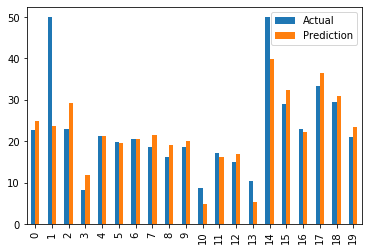

In [86]:
#Getting first 20 values to compare
df_pred_test_sample = df_pred_test.head(20)
df_pred_test_sample.plot(kind='bar')

In [94]:
#Overall, the predictions line up with the actual results fairly well except for a few outliers
#Let's look at the difference between all the values
absolute1 = abs(df_pred_test['Actual'] - df_pred_test['Prediction'])
absolute2 = abs(df_pred_test['Actual'] + df_pred_test['Prediction'])
df_pred_test['Difference'] = (absolute1 / (absolute2 / 2)) * 100

In [92]:
df_pred_test

,Actual,Prediction,Difference
0,22.6,24.952333,9.893659
1,50.0,23.616997,71.676389
2,23.0,29.205886,23.774659
3,8.3,11.960705,36.136009
4,21.2,21.333620,0.628305
...,...,...,...
122,19.4,17.538048,10.081484
123,21.2,21.502223,1.415492
124,20.3,23.632813,15.172318
125,18.8,20.282598,7.586999


In [101]:
#And finally the average difference in percent for prediction vs actual values
f"{df_pred_test['Difference'].mean()}%"

'18.542988927949366%'